<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTESTO:**
Si prevede che la nostra popolazione mondiale crescerà dai 7,3 miliardi di oggi a 9,7 miliardi nell'anno 2050. Trovare soluzioni per nutrire la popolazione mondiale in crescita è diventato un tema scottante per le organizzazioni, gli imprenditori e i filantropi dell'agricoltura e dell'alimentazione.

Queste soluzioni vanno dal cambiamento del modo in cui coltiviamo e alleviamo il nostro cibo al cambiamento del modo in cui mangiamo. 
Per rendere le cose più difficili, il clima della Terra sta cambiando ed è influenzato dall'agricoltura. Poiché la popolazione mondiale si è espansa e si è arricchita, la domanda di cibo, energia e acqua ha visto un rapido aumento.
Non solo è aumentata la domanda per tutti e tre, ma sono anche fortemente interconnessi: la produzione alimentare richiede acqua ed energia; la produzione energetica tradizionale richiede risorse idriche; l'agricoltura fornisce una potenziale fonte di energia e tanta acqua. 
 
 
**OBIETTIVO:** 
A partire dai dati inerenti alla produzione e distribuzione mondiale di alimenti e mangimi si analizzi l'impatto negativo che questi hanno sull'ambiente. Una volta terminata l'EDA, utilizza i metodi di scaling ed encoding visti a lezione per preparare al meglio il dataset per un ipotetico modello predittivo ( vedi data preprocessing ) :

qui di seguito alcune domande per ispirarti

- quali sono i 5 alimenti e mangimi che hanno l'impatto peggiore sull'ambiente ?
- qual è il paese che nel tempo è più riuscito a diminuire l'impatto negativo della propria produzione e distribuzione di alimenti e mangimi?


**Dati a disposizione:**

- A questo link (https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production), sul sito di Kaggle, trovi il primo dataset utile che fornisce una panoramica della nostra produzione alimentare mondiale, concentrandosi su un confronto tra alimenti prodotti per il consumo umano e mangimi prodotti per animali.

- Questo dataset è messo a disposizione dall’Organizzazione delle Nazioni Unite, che per l'alimentazione e l'agricoltura fornisce libero accesso ai dati su cibo e agricoltura per oltre 245 paesi e territori (qui il link al sito ufficiale https://www.kaggle.com/dorbicycle/world-foodfeed-production), dall'anno 1961 all'aggiornamento più recente.

- Mentre il secondo dataset utile presente a questo link (https://www.kaggle.com/selfvivek/environment-impact-of-food-production) contiene i 43 alimenti più comuni coltivati ​​in tutto il mondo e 23 colonne che descrivono valori come l’utilizzo dell'acqua ed emissioni di gas serra.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from mpl_toolkits.basemap import Basemap

In [2]:
df_productions = pd.read_csv("FAO.csv",encoding='latin')
df_impact = pd.read_csv("Food_Production.csv")

#### Analizziamo i dataset

In [3]:
df_impact.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [4]:
df_productions

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
df_impact.dtypes.head(10)

Food product                                                 object
Land use change                                             float64
Animal Feed                                                 float64
Farm                                                        float64
Processing                                                  float64
Transport                                                   float64
Packging                                                    float64
Retail                                                      float64
Total_emissions                                             float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)    float64
dtype: object

In [6]:
df_productions.dtypes.head(10)

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
Element Code           int64
Element               object
Unit                  object
latitude             float64
longitude            float64
dtype: object

#### Abbiamo deciso di concentrarci su Emissioni Totale, Consumo di Acqua e Utilizzo della superficie 

In [7]:
df_impact_2 = df_impact[["Food product","Total_emissions","Freshwater withdrawals per kilogram (liters per kilogram)","Land use per kilogram (m² per kilogram)"]]

#### Estraiamo la lista dei cibi prodotti in tutti i Paesi

In [8]:
food_list = df_productions["Item"].unique().tolist()
food_list = sorted(food_list)

#### I primi 10 Paesi per produzione di cibo nel 2013

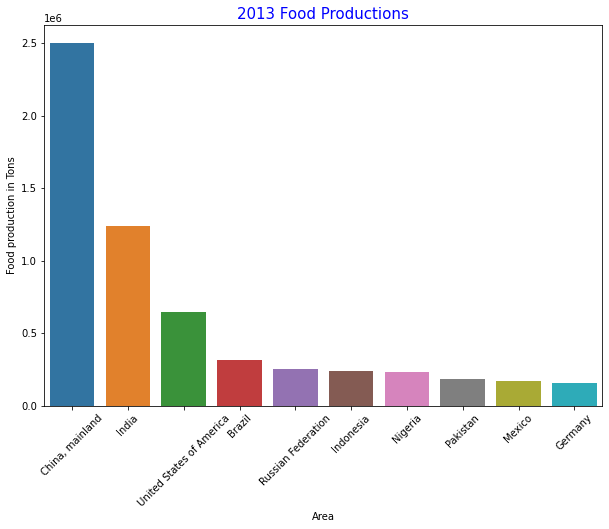

In [9]:
top10_producers_food = df_productions[df_productions["Element"]== "Food"].groupby("Area")["Y2013"].sum().reset_index().sort_values("Y2013",ascending=False)[:10]
top10_producers_food.rename(columns = {"Y2013":"Food production in Tons"}, inplace = True)
plt.figure(figsize=(10,7))
sns.barplot(x="Area",y="Food production in Tons",data=top10_producers_food)
plt.xticks(rotation=45)
plt.title('2013 Food Productions',color = 'blue',fontsize=15);

#### I primi 10 Paesi per produzione di mangimi nel 2013

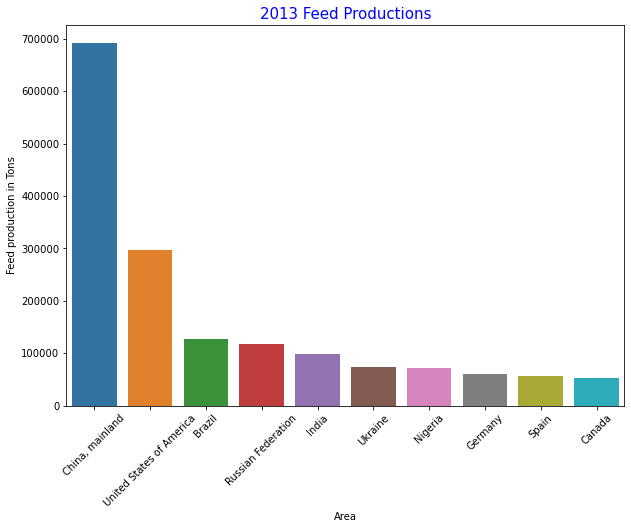

In [10]:
top10_producers_feed = df_productions[df_productions["Element"]== "Feed"].groupby("Area")["Y2013"].sum().reset_index().sort_values("Y2013",ascending=False)[:10]
top10_producers_feed.rename(columns = {"Y2013":"Feed production in Tons"}, inplace = True)
plt.figure(figsize=(10,7))
sns.barplot(x="Area",y="Feed production in Tons",data=top10_producers_feed)
plt.xticks(rotation=45)
plt.title('2013 Feed Productions',color = 'blue',fontsize=15);

#### Abbiamo uniformato gli alimenti per poterli confrontare tra i due dataset

In [11]:
df_impact_2 = df_impact_2.append({'Food product':'Bovine Meat', 'Total_emissions': 80.7 , 'Freshwater withdrawals per kilogram (liters per kilogram)': 4165.5, "Land use per kilogram (m² per kilogram)":369.34}, ignore_index=True)
df_impact_2 = df_impact_2.append({'Food product':'Milk - Excluding Butter','Total_emissions':24,'Freshwater withdrawals per kilogram (liters per kilogram)':6233.4, "Land use per kilogram (m² per kilogram)":96.74}, ignore_index=True)
df_impact_2 = df_impact_2[(df_impact_2["Food product"] != "Beef (beef herd)" ) & (df_impact_2["Food product"] != "Beef (dairy herd)") & (df_impact_2["Food product"] != "Cheese") & (df_impact_2["Food product"] != "Milk") ]
df_impact_2['Freshwater withdrawals per kilogram (liters per kilogram)'] = df_impact_2['Freshwater withdrawals per kilogram (liters per kilogram)']*1000
df_impact_2["Land use per kilogram (m² per kilogram)"] = df_impact_2["Land use per kilogram (m² per kilogram)"]*0.1
df_impact_2.rename(columns = {'Freshwater withdrawals per kilogram (liters per kilogram)':'Freshwater withdrawals per ton (liters per ton)', 'Land use per kilogram (m² per kilogram)':'Land use per ton (ettari per ton)'}, inplace = True)

/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_68507/56065108.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_impact_2 = df_impact_2.append({'Food product':'Bovine Meat', 'Total_emissions': 80.7 , 'Freshwater withdrawals per kilogram (liters per kilogram)': 4165.5, "Land use per kilogram (m² per kilogram)":369.34}, ignore_index=True)
/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_68507/56065108.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_impact_2 = df_impact_2.append({'Food product':'Milk - Excluding Butter','Total_emissions':24,'Freshwater withdrawals per kilogram (liters per kilogram)':6233.4, "Land use per kilogram (m² per kilogram)":96.74}, ignore_index=True)


In [12]:
df_impact_2 = df_impact_2.drop_duplicates("Food product",keep="first")

#### Grafichiamo i primi 10 alimenti per emissione di CO2

In [13]:
df_impact_emissions = df_impact_2.sort_values("Total_emissions",ascending=False).iloc[:10]

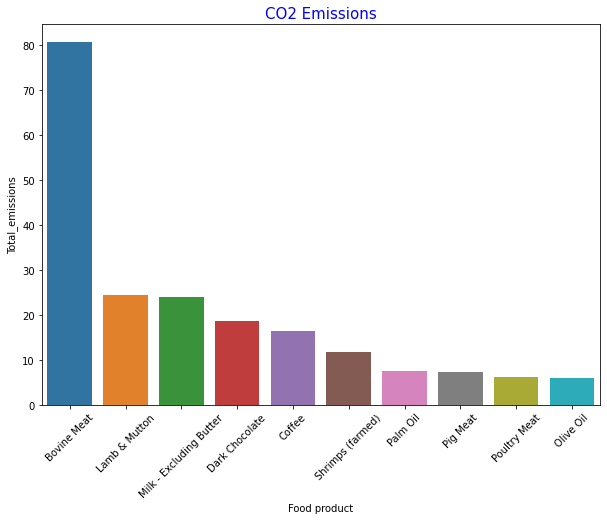

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x="Food product",y="Total_emissions",data=df_impact_emissions)
plt.xticks(rotation=45)
plt.title('CO2 Emissions',color = 'blue',fontsize=15);

#### Grafichiamo i primi 10 alimenti per emissione di Consumo di Acqua

In [15]:
df_impact_water = df_impact_2.sort_values('Freshwater withdrawals per ton (liters per ton)',ascending=False).iloc[:10]

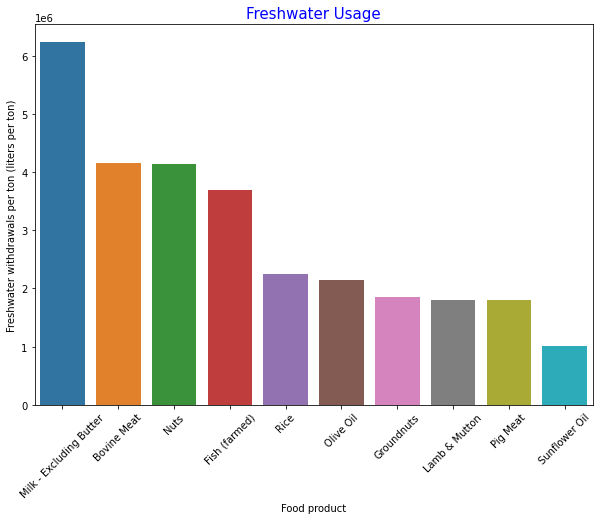

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="Food product",y="Freshwater withdrawals per ton (liters per ton)",data=df_impact_water)
plt.xticks(rotation=45)
plt.title('Freshwater Usage',color = 'blue',fontsize=15);

#### Grafichiamo i primi 10 alimenti per emissione di Utilizzo della Superficie

In [17]:
df_impact_land = df_impact_2.sort_values('Land use per ton (ettari per ton)',ascending=False).iloc[:10]

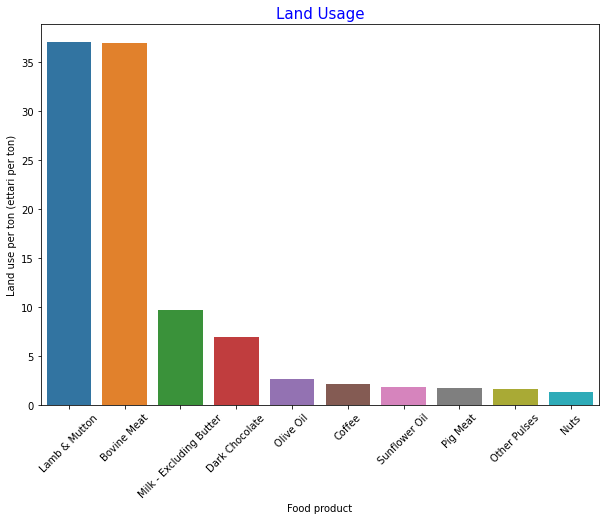

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x="Food product",y="Land use per ton (ettari per ton)",data=df_impact_land)
plt.xticks(rotation=45)
plt.title('Land Usage',color = 'blue',fontsize=15);

### Creiamo il dizionario per sostituire i campi che abbiamo selezionato come più impattanti

In [19]:
dict_df2_to_df1 = {'Bovine Meat': 'Bovine Meat',
                  'Mutton & Goat Meat': 'Lamb & Mutton',
                   'Milk - Excluding Butter':'Milk - Excluding Butter',
                   'Dark Chocolate': 'Cocoa Beans and products',
                   'Coffee':'Coffee and products',
                   'Shrimps (farmed)':'Crustaceans',
                   'Palm Oil':'Palm Oil',
                   'Pig Meat':'Pigmeat',
                   'Poultry Meat':'Poultry Meat',
                   'Olive Oil':'Olive Oil',
                   'Nuts':'Nuts and products',
                   'Fish (farmed)':'Fish, Seafood',
                   'Rice':'Rice (Milled Equivalent)',
                   'Groundnuts':'Groundnuts (Shelled Eq)',
                   'Sunflower Oil':'Sunflowerseed Oil'
                  }

### usiamo un ciclo for per sostituire nel dataframe impact i valori

In [20]:
df_1_list = dict_df2_to_df1.values()
df_2_list = dict_df2_to_df1.keys()

for key, value in dict_df2_to_df1.items():
    if key in df_2_list:
        df_impact_2['Food product'] = df_impact_2['Food product'].replace(key, value)   

In [21]:
df_impact_2.sort_values('Food product').head(10)

,Food product,Total_emissions,Freshwater withdrawals per ton (liters per ton),Land use per ton (ettari per ton)
27,Apples,0.3,180100.0,0.063
26,Bananas,0.8,114500.0,0.193
2,Barley (Beer),1.1,NaN,NaN
8,Beet Sugar,1.4,217700.0,0.183
28,Berries & Grapes,1.1,419600.0,0.241
43,Bovine Meat,80.7,4165500.0,36.934
23,Brassicas,0.4,119400.0,0.055
7,Cane Sugar,2.6,620100.0,0.204
6,Cassava,0.9,0.0,0.181
25,Citrus Fruit,0.3,82700.0,0.086


### Droppiamo da df_impact_2 le righe che non ci interessano più con un ciclo

In [22]:
list_all = list(df_impact_2['Food product'])

In [23]:
for item in list_all:
    if item not in df_1_list:
        df_impact_2 = df_impact_2.drop(df_impact_2[df_impact_2['Food product'] == item].index)     

In [24]:
df_impact_2

,Food product,Total_emissions,Freshwater withdrawals per ton (liters per ton),Land use per ton (ettari per ton)
4,Rice (Milled Equivalent),4.0,2248400.0,0.280
11,Nuts and products,0.2,4133800.0,1.296
12,Groundnuts (Shelled Eq),2.4,1852300.0,0.911
16,Palm Oil,7.6,6400.0,0.242
17,Sunflowerseed Oil,3.5,1007900.0,1.766
19,Olive Oil,6.0,2141800.0,2.631
31,Coffee and products,16.5,25900.0,2.162
32,Cocoa Beans and products,18.7,540600.0,6.896
35,Lamb & Mutton,24.5,1802800.0,36.981
36,Pigmeat,7.2,1795800.0,1.736


### Uniamo i due dataset

Sostituiamo i null con 0 e uniamo i dataset per Food

In [25]:
df_impact_4 = df_impact_2.fillna(0)
df_merged = df_productions.merge(df_impact_4, left_on="Item", right_on="Food product")

## Elimiamo le colonne poco rilevanti

In [26]:
df_merged_2 = df_merged.drop(['Area Abbreviation',"Area Code","Item Code","Element Code","Unit"], axis=1)

## Aggiungiamo le colonne decadi raggruppando gli anni

In [27]:
df_merged_2["1961-1970"] = df_merged_2.iloc[:,5:15].sum(axis=1)
df_merged_2["1971-1980"] = df_merged_2.iloc[:,15:25].sum(axis=1)
df_merged_2["1981-1990"] = df_merged_2.iloc[:,25:35].sum(axis=1)
df_merged_2["1991-2000"] = df_merged_2.iloc[:,35:45].sum(axis=1)
df_merged_2["2001-2010"] = df_merged_2.iloc[:,45:55].sum(axis=1)

## Elimiamo le colonne dei singoli anni

In [28]:
df_merged_3 = df_merged_2.drop(df_merged_2.columns[[range(5,58)]], axis=1)

/Users/alessandroguidi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


## Sommiamo "Feed" & "Food"

In [29]:
df_merged_4 = df_merged_3.groupby(["Area","Item","latitude","longitude"])["Total_emissions","Freshwater withdrawals per ton (liters per ton)","Land use per ton (ettari per ton)","1961-1970","1971-1980","1981-1990","1991-2000","2001-2010"].sum().reset_index()

/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_68507/738506223.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merged_4 = df_merged_3.groupby(["Area","Item","latitude","longitude"])["Total_emissions","Freshwater withdrawals per ton (liters per ton)","Land use per ton (ettari per ton)","1961-1970","1971-1980","1981-1990","1991-2000","2001-2010"].sum().reset_index()


## Creiamo delle colonne di emissioni di CO2 per decade

In [30]:
df_merged_4["CO2 1961-1970"]=df_merged_4["Total_emissions"]*df_merged_4["1961-1970"]
df_merged_4["CO2 1971-1980"]=df_merged_4["Total_emissions"]*df_merged_4["1971-1980"]
df_merged_4["CO2 1981-1990"]=df_merged_4["Total_emissions"]*df_merged_4["1981-1990"]
df_merged_4["CO2 1991-2000"]=df_merged_4["Total_emissions"]*df_merged_4["1991-2000"]
df_merged_4["CO2 2001-2010"]=df_merged_4["Total_emissions"]*df_merged_4["2001-2010"]
df_merged_4.head()

,Area,Item,latitude,longitude,Total_emissions,Freshwater withdrawals per ton (liters per ton),Land use per ton (ettari per ton),1961-1970,1971-1980,1981-1990,1991-2000,2001-2010,CO2 1961-1970,CO2 1971-1980,CO2 1981-1990,CO2 1991-2000,CO2 2001-2010
0,Afghanistan,Bovine Meat,33.94,67.71,80.7,4165500.0,36.934,574.0,642.0,711.0,1258.0,1356.0,46321.8,51809.4,57377.7,101520.6,109429.2
1,Afghanistan,Cocoa Beans and products,33.94,67.71,18.7,540600.0,6.896,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,93.5
2,Afghanistan,Coffee and products,33.94,67.71,16.5,25900.0,2.162,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.5
3,Afghanistan,"Fish, Seafood",33.94,67.71,5.1,3691300.0,0.841,0.0,10.0,10.0,18.0,14.0,0.0,51.0,51.0,91.8,71.4
4,Afghanistan,Milk - Excluding Butter,33.94,67.71,96.0,24933600.0,38.696,14074.0,15564.0,14310.0,27764.0,33504.0,1351104.0,1494144.0,1373760.0,2665344.0,3216384.0


## Sommiamo le emissioni di co2 per Paese e suddiviamoli per decadi

In [31]:
df_co2 = df_merged_4.groupby("Area")[["CO2 1961-1970","CO2 1971-1980","CO2 1981-1990","CO2 1991-2000","CO2 2001-2010"]].sum().reset_index()
df_top10_2001 = df_co2.sort_values("CO2 2001-2010",ascending=False)[:9]
df_top10_1991 = df_co2.sort_values("CO2 1991-2000",ascending=False)[:9]
df_top10_1981 = df_co2.sort_values("CO2 1981-1990",ascending=False)[:9]
df_top10_1971 = df_co2.sort_values("CO2 1971-1980",ascending=False)[:9]
df_top10_1961 = df_co2.sort_values("CO2 1961-1970",ascending=False)[:9]

In [32]:
primo = df_co2.sort_values("CO2 1961-1970",ascending=False)[9:]['CO2 1961-1970'].sum()
secondo = df_co2.sort_values("CO2 1971-1980",ascending=False)[9:]['CO2 1971-1980'].sum()
terzo = df_co2.sort_values("CO2 1981-1990",ascending=False)[9:]['CO2 1981-1990'].sum()
quarto = df_co2.sort_values("CO2 1991-2000",ascending=False)[9:]['CO2 1991-2000'].sum()
quinto= df_co2.sort_values("CO2 2001-2010",ascending=False)[9:]['CO2 2001-2010'].sum()

In [33]:
other_nations_1 = pd.DataFrame({"Area":"Other Nations","CO2 1961-1970":58325505.5},index=[0])
other_nations_2 = pd.DataFrame({"Area":"Other Nations","CO2 1971-1980":71276784.6},index=[0])
other_nations_3 = pd.DataFrame({"Area":"Other Nations","CO2 1981-1990":85536964.2},index=[0])
other_nations_4 = pd.DataFrame({"Area":"Other Nations","CO2 1991-2000":125253163.3},index=[0])
other_nations_5 = pd.DataFrame({"Area":"Other Nations","CO2 2001-2010":145654327.4},index=[0])
df_top10_1961 = pd.concat([df_top10_1961, other_nations_1], axis=0)
df_top10_1971 = pd.concat([df_top10_1971, other_nations_2], axis=0)
df_top10_1981 = pd.concat([df_top10_1981, other_nations_3], axis=0)
df_top10_1991 = pd.concat([df_top10_1991, other_nations_4], axis=0)
df_top10_2001 = pd.concat([df_top10_2001, other_nations_5], axis=0)

## Creiamo dei grafici a torta con le 10 nazioni più inquinanti per ogni decade

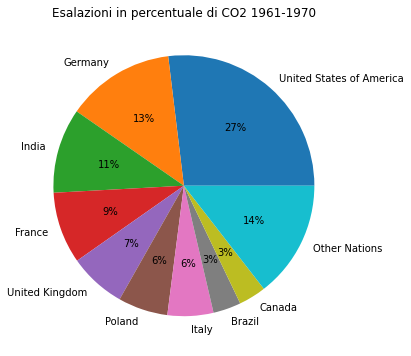

In [34]:
plt.figure(figsize=(8,6))
plt.pie(x=df_top10_1961["CO2 1961-1970"], labels=df_top10_1961.Area.values, autopct = '%0.0f%%')
plt.title("Esalazioni in percentuale di CO2 1961-1970")
plt.show()

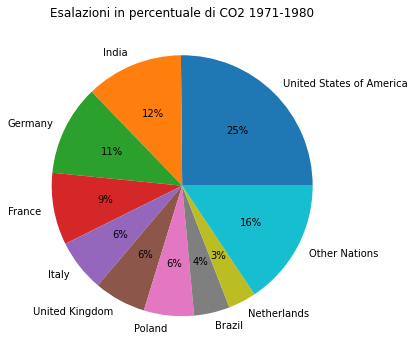

In [35]:
plt.figure(figsize=(8,6))
plt.pie(x=df_top10_1971["CO2 1971-1980"], labels=df_top10_1971.Area.values, autopct = '%0.0f%%')
plt.title("Esalazioni in percentuale di CO2 1971-1980")
plt.show()

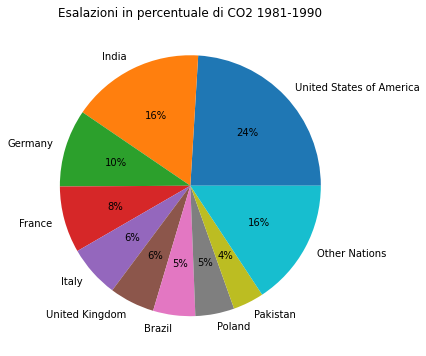

In [36]:
plt.figure(figsize=(8,6))
plt.pie(x=df_top10_1981["CO2 1981-1990"], labels=df_top10_1981.Area.values, autopct = '%0.0f%%')
plt.title("Esalazioni in percentuale di CO2 1981-1990")
plt.show()

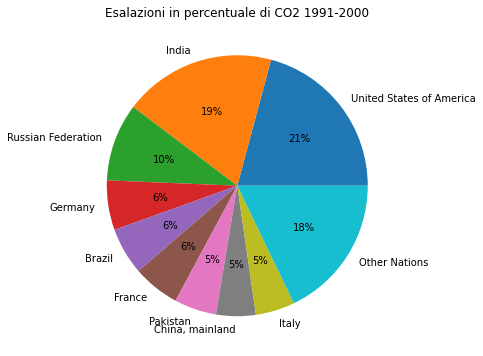

In [37]:
plt.figure(figsize=(8,6))
plt.pie(x=df_top10_1991["CO2 1991-2000"], labels=df_top10_1991.Area.values, autopct = '%0.0f%%')
plt.title("Esalazioni in percentuale di CO2 1991-2000")
plt.show()

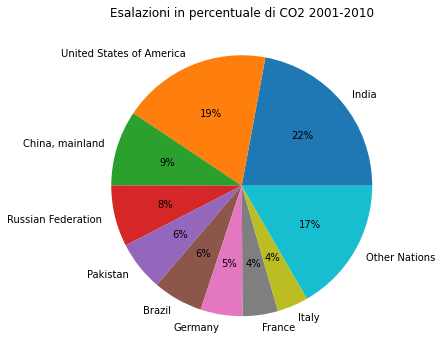

In [38]:
plt.figure(figsize=(8,6))
plt.pie(x=df_top10_2001["CO2 2001-2010"], labels=df_top10_2001.Area.values, autopct = '%0.0f%%')
plt.title("Esalazioni in percentuale di CO2 2001-2010")
plt.show()

 ## Creiamo le colonne di utilizzo di acqua e terra per Paese per decade

In [39]:
df_merged_4["Freshwater withdrawals 1961-1970"]=(df_merged_4["Freshwater withdrawals per ton (liters per ton)"]*1000)*df_merged_4["1961-1970"]
df_merged_4["Freshwater withdrawals 1971-1980"]=(df_merged_4["Freshwater withdrawals per ton (liters per ton)"]*1000)*df_merged_4["1971-1980"]
df_merged_4["Freshwater withdrawals 1981-1990"]=(df_merged_4["Freshwater withdrawals per ton (liters per ton)"]*1000)*df_merged_4["1981-1990"]
df_merged_4["Freshwater withdrawals 1991-2000"]=(df_merged_4["Freshwater withdrawals per ton (liters per ton)"]*1000)*df_merged_4["1991-2000"]
df_merged_4["Freshwater withdrawals 2001-2010"]=(df_merged_4["Freshwater withdrawals per ton (liters per ton)"]*1000)*df_merged_4["2001-2010"]

In [40]:
df_merged_4["Land use in ettari 1961-1970"]=(df_merged_4["Land use per ton (ettari per ton)"]*1000)*df_merged_4["1961-1970"]
df_merged_4["Land use in ettari 1971-1980"]=(df_merged_4["Land use per ton (ettari per ton)"]*1000)*df_merged_4["1971-1980"]
df_merged_4["Land use in ettari 1981-1990"]=(df_merged_4["Land use per ton (ettari per ton)"]*1000)*df_merged_4["1981-1990"]
df_merged_4["Land use in ettari 1991-2000"]=(df_merged_4["Land use per ton (ettari per ton)"]*1000)*df_merged_4["1991-2000"]
df_merged_4["Land use in ettari 2001-2010"]=(df_merged_4["Land use per ton (ettari per ton)"]*1000)*df_merged_4["2001-2010"]

## Raggruppiamo e ordiniamo per CO2 emessa nel 2001-2010

In [41]:
df_total_usage = df_merged_4.groupby("Area")[["CO2 1961-1970","CO2 1971-1980","CO2 1981-1990","CO2 1991-2000","CO2 2001-2010","Freshwater withdrawals 1961-1970","Freshwater withdrawals 1971-1980","Freshwater withdrawals 1981-1990","Freshwater withdrawals 1991-2000","Freshwater withdrawals 2001-2010","Land use in ettari 1961-1970","Land use in ettari 1971-1980","Land use in ettari 1981-1990","Land use in ettari 1991-2000","Land use in ettari 2001-2010"]].sum().reset_index()
df_total_usage = df_total_usage.sort_values("CO2 2001-2010",ascending=False).reset_index()
df_total_usage['index'] = df_total_usage.index

## Togliamo l'area

In [42]:
df_total_usage_2 = df_total_usage.drop("Area", axis=1,)

## creiamo l'array con l'utilizzo totale di risorse

In [43]:
array_total_usage_3 = df_total_usage_2.values
array_total_usage_3

array([[0.00000000e+00, 4.22655649e+07, 5.48556263e+07, ...,
        3.45262711e+10, 5.13034165e+10, 7.54775462e+10],
       [1.00000000e+00, 1.08303537e+08, 1.14558199e+08, ...,
        5.27844708e+10, 5.88610933e+10, 6.52142343e+10],
       [2.00000000e+00, 8.09776020e+06, 1.15173986e+07, ...,
        5.02368874e+09, 9.86901227e+09, 2.82283673e+10],
       ...,
       [1.71000000e+02, 1.61040000e+03, 2.11040000e+03, ...,
        8.42872000e+05, 7.73708000e+05, 1.64810400e+06],
       [1.72000000e+02, 3.41000000e+02, 1.31900000e+03, ...,
        4.54670000e+05, 7.25128000e+05, 9.43862000e+05],
       [1.73000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Applichiamo lo StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaled_array = scaler.fit_transform(array_total_usage_3)

In [46]:
scaled_array

array([[-1.72212493,  3.67820564,  4.42565155, ...,  5.92939771,
         7.16291845,  8.47805909],
       [-1.70221597,  9.88633131,  9.58437492, ...,  9.22848959,
         8.26771263,  7.2807308 ],
       [-1.68230702,  0.46614419,  0.680923  , ...,  0.59854735,
         1.10596611,  2.96592233],
       ...,
       [ 1.68230702, -0.29496209, -0.31407912, ..., -0.30903556,
        -0.33658995, -0.32703515],
       [ 1.70221597, -0.29508143, -0.3141475 , ..., -0.30910571,
        -0.33659705, -0.3271173 ],
       [ 1.72212493, -0.29511348, -0.31426147, ..., -0.30918786,
        -0.33670305, -0.32722742]])

## 1 Pulizia dataframes e unione


## 2 Calcolare i 5 mangimi e alimenti e graficarli per anno 

## 3 Calcolo co2 per mangime / alimento (per nazione per anno) e graficare

## 4 Encoding

## 5 Normalize